# SLM Spring 2022/23
## Laboratory exam

Please fill your name and index number below. Additionally, replace _index_number_ in file name with your index number. Complete the tasks and send the notebook to lkrain@sgh.waw.pl. 

In [1]:
using CSV
using DataFrames
using Downloads
using FreqTables
using GLM
using MLJ
using Plots
using Random
using ROCCurves
using ShapML

## Task 1 (20pts)

**(2p)** Download and load data from the URL https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/german.csv into a `DataFrame`. Dataset has no header. Make sure the last column's name is `target`, other columns may have any name.

In [2]:
url = "https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/german.csv"
Downloads.download(url, "german.csv")


"german.csv"

In [3]:
german =  CSV.read("german.csv", header=false, DataFrame)
rename!(german, ncol(german) => :target)

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1
2,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2
3,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1
4,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1
5,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2
6,4,36,2,91,5,3,3,4,4,35,3,1,2,2,1,0,0,1,0,0,0,0,1,0,1
7,4,24,2,28,3,5,3,4,2,53,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
8,2,36,2,69,1,3,3,2,3,35,3,1,1,2,1,0,1,1,0,1,0,0,0,0,1
9,4,12,2,31,4,4,1,4,1,61,3,1,1,1,1,0,0,1,0,0,1,0,1,0,1


**(2p)** The `target` feature informs about the client's default - 2 => client is not repaying the debt, 1 => client is repaying the debt. Recode `target`, so that clients not repaying the debt are marked as 1 and 0 otherwise.

In [4]:
german.target = ifelse.(german.target .== 1, 0, 1)
german

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,0
2,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1
3,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,0
4,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,0
5,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,1
6,4,36,2,91,5,3,3,4,4,35,3,1,2,2,1,0,0,1,0,0,0,0,1,0,0
7,4,24,2,28,3,5,3,4,2,53,3,1,1,1,1,0,0,1,0,0,1,0,0,1,0
8,2,36,2,69,1,3,3,2,3,35,3,1,1,2,1,0,1,1,0,1,0,0,0,0,0
9,4,12,2,31,4,4,1,4,1,61,3,1,1,1,1,0,0,1,0,0,1,0,1,0,0


**(2p)** Split the data into train **(85% of observations)** and validation datasets. Set random seed using `Random` module to **2**.

In [5]:
training_fraction = 0.85
Random.seed!(2)
train, test = partition(eachindex(german.target), training_fraction, shuffle=true)

([250, 266, 267, 115, 885, 10, 753, 21, 63, 946  …  280, 507, 654, 53, 929, 212, 837, 87, 329, 894], [281, 815, 310, 696, 765, 487, 700, 492, 898, 248  …  872, 69, 96, 368, 659, 254, 557, 738, 467, 468])

In [6]:
train_dataset = german[train,:]
test_dataset = german[test,:]

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,4,15,4,34,4,5,3,4,4,23,3,2,1,2,1,0,1,1,0,1,0,0,0,1,0
2,1,48,2,39,1,4,3,4,4,46,3,1,2,1,1,1,0,1,0,0,0,0,0,1,1
3,2,9,2,3,1,3,4,4,1,22,3,1,1,1,1,1,0,1,0,1,0,0,1,0,0
4,4,6,2,12,3,3,3,4,2,50,3,1,1,1,1,0,1,1,0,1,0,0,0,1,0
5,4,24,4,25,2,4,4,3,2,27,3,2,1,2,1,1,0,1,0,0,1,0,0,1,0
6,4,12,2,31,1,3,3,4,3,52,3,1,1,2,1,0,0,1,0,0,1,0,0,1,0
7,3,15,2,19,1,5,3,4,3,40,3,1,1,2,1,0,0,1,0,1,0,0,0,0,0
8,2,27,0,83,1,5,2,4,4,42,3,2,1,2,1,0,0,1,0,0,0,0,0,0,1
9,4,12,4,16,4,4,2,2,2,35,3,1,1,1,2,0,0,1,0,0,1,0,0,1,0


**(2p)** Train logistic regression with `glm` function from `GLM` package. The target variable is `target`, all other features in the dataset are predictors. How many coefficients the model has? What is the value of intercept?

In [7]:
model_log_reg_fit = glm(Term(:target) ~ sum(Term.(Symbol.(names(german[:, Not(:target)])))),
                        train_dataset, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

target ~ 1 + Column1 + Column2 + Column3 + Column4 + Column5 + Column6 + Column7 + Column8 + Column9 + Column10 + Column11 + Column12 + Column13 + Column14 + Column15 + Column16 + Column17 + Column18 + Column19 + Column20 + Column21 + Column22 + Column23 + Column24

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.36296     1.23894      1.91    0.0565  -0.0653236    4.79123
Column1      -0.565941    0.077752    -7.28    <1e-12  -0.718332    -0.413549
Column2       0.0301256   0.00923385   3.26    0.0011   0.0120276    0.0482236
Column3

In [8]:
coef(model_log_reg_fit)

25-element Vector{Float64}:
  2.362955080286943
 -0.5659405872684959
  0.030125574045328358
 -0.379570025726549
  0.004498236065763254
 -0.2302745658708451
 -0.16140510086080068
 -0.18673144765948604
 -0.0313842720229124
  0.2242288179434461
 -0.005879765780930863
 -0.2750528755941341
  0.2149576678384885
  0.08468073398603972
 -0.24940262789083753
 -1.1897009383739403
  0.7488235037527048
 -1.0098070942406394
  1.1586474377317082
  1.2951660320535832
  0.590000520705178
 -0.014380806675230624
 -0.5174228823596695
  0.09579979489998833
  0.03359340656051505

the value of intercept is:-2.362955080286941

**(2p)** Calculate score on the training dataset and validation dataset.

In [9]:
train_pred = GLM.predict(model_log_reg_fit)


850-element Vector{Float64}:
 0.2806249932444231
 0.2731315876008826
 0.03716350300785614
 0.17241111895609743
 0.40282360455332294
 0.5745824196186617
 0.3171447261922137
 0.12778515557475903
 0.5412555840427845
 0.9096840383341909
 0.16013066650591687
 0.45489314864251074
 0.43474711959570783
 ⋮
 0.7517058940999657
 0.09236919133306883
 0.19074630837886747
 0.024692193348197236
 0.5836094965361017
 0.13723026408642877
 0.046559332890443055
 0.053342062495574265
 0.07127094788053516
 0.2836347474230972
 0.3178481702607983
 0.15443254727733086

In [10]:
test_pred = GLM.predict(model_log_reg_fit, test_dataset)

150-element Vector{Union{Missing, Float64}}:
 0.024290661541047292
 0.8563468942116286
 0.4733072562364626
 0.0347668393865752
 0.09000719470108566
 0.09722511510787026
 0.212893625047151
 0.6662030745286509
 0.008815775122470726
 0.3579095958474257
 0.22158971205424108
 0.07133988305859691
 0.11931467801759126
 ⋮
 0.15062417602038639
 0.24044855685082103
 0.03518926232279556
 0.27646824530947367
 0.9211708043058038
 0.7409545391970773
 0.7578039029036608
 0.11346466672514001
 0.787661888616536
 0.6163301101223326
 0.6459002848790533
 0.20835858981853128

**(2p)** Use a cutoff threshold of **0.6** for both scores vectors to create prediction vectors. How many positive predictions are present in each prediction vector?

In [11]:
conf_mat_train = freqtable(train_pred .> 0.6, train_dataset.target)


2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
false       │ 562  151
true        │  34  103

In [12]:
conf_mat_test = freqtable(test_pred .> 0.6, test_dataset.target)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │  0   1
────────────┼───────
false       │ 97  34
true        │  7  12

**(4p)** Plot ROC curves for the created logistic regression model. The plot should contain two curves:
1) ROC curve based on the training data

2) ROC curve based on the validation data

Calculate and print Area Under the Curve (AUC) value for both curves. 

Comment on the predictive power of the model based on ROC chart and AUC values.

In [13]:
function quality_report(mat::AbstractMatrix)
    acc = (mat[1,1] + mat[2,2]) / sum(mat)
    prec = mat[2,2] / sum(mat[2,:])
    rec = mat[2,2] / sum(mat[:,2])
    f1 = 2 * prec * rec / (prec + rec)
    println("----Classification quality report----")
    println("Accuracy: ", round(acc*100,digits=2), "%")
    println("Precision: ", round(prec*100,digits=2), "%")
    println("Recall: ", round(rec*100,digits=2), "%")
    println("F1-score: ", round(f1*100,digits=2), "%")
end

quality_report (generic function with 1 method)

In [14]:
println("Train set")
quality_report(conf_mat_train)
println("\nTest set")
quality_report(conf_mat_test)


Train set
----Classification quality report----
Accuracy: 78.24%
Precision: 75.18%
Recall: 40.55%
F1-score: 52.69%

Test set
----Classification quality report----
Accuracy: 72.67%
Precision: 63.16%
Recall: 26.09%
F1-score: 36.92%


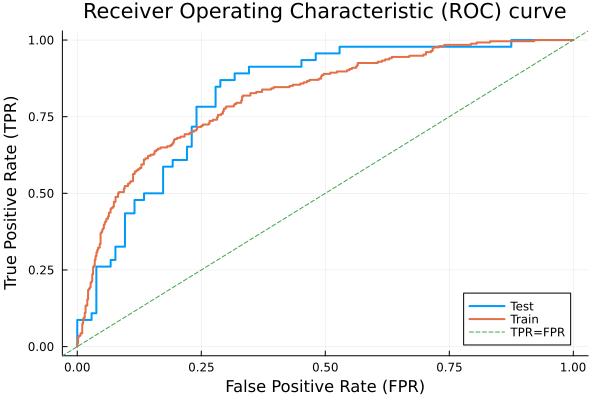

In [15]:
train_fpr, train_tpr = ROCCurves.roc(train_pred, train_dataset.target)
test_fpr, test_tpr = ROCCurves.roc(test_pred, test_dataset.target)
plot(test_fpr, test_tpr, label="Test", xlabel="False Positive Rate (FPR)",
    ylabel="True Positive Rate (TPR)",
    title ="Receiver Operating Characteristic (ROC) curve", linewidth=2, legend=:bottomright)
plot!(train_fpr, train_tpr, label="Train", linewidth=2)
Plots.abline!(1, 0, line=:dash, label = "TPR=FPR")


In [16]:
println("AUC metric on train dataset is equal to: ", auc_roc(train_fpr, train_tpr))
println("AUC metric on test dataset is equal to: ", auc_roc(test_fpr, test_tpr))

AUC metric on train dataset is equal to: 0.8159911219151299
AUC metric on test dataset is equal to: 0.8210702341137124


from the roc we can see that has a good predictive power and from AUC values it doesn't overfit as the discrepancy is really small.

**(4p)** A following confusion matrix is given:

| A\P | 1   | 0   |
|-----|-----|-----|
| 1   | 123 | 321 |
| 0   | 324 | 456 |

Prediction values are in columns, actual values in rows.

Calculate:
* Accuracy
* Precision
* Recall
* F1-score

In [17]:
A = [123 321; 324 456]


2×2 Matrix{Int64}:
 123  321
 324  456

In [18]:
println("A")
quality_report(A)

A
----Classification quality report----
Accuracy: 47.3%
Precision: 58.46%
Recall: 58.69%
F1-score: 58.57%


## Task 2 (20p)

**(1p)** Download and load data from the URL https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/Boston.csv into a `DataFrame`.

In [19]:
# url = "https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/Boston.csv"
# Downloads.download(url, "Boston.csv")


In [20]:
houses = CSV.read("Boston.csv", DataFrame,delim=",")

LoadError: ArgumentError: "Boston.csv" is not a valid file or doesn't exist

**(2p)** Add new column `price_bin` to the dataset. `price_bin` should have value 1 if feature `medv` is higher or equal to **22.5** and 0 otherwise. Remove columns `medv` and `Column1` from the dataset.

In [ ]:
houses.price_bin = ifelse.(houses.medv .>= 22.5, 1, 0)



506-element Vector{Int64}:
 1
 0
 1
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 ⋮
 1
 1
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0

In [ ]:
select!(houses, Not(:Column1))



Row,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price_bin
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2,1
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9,1
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1,1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0


In [ ]:
select!(houses, Not(:medv))
houses

Row,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price_bin
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,1
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,1
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,1
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,0


**(2p)** Check scientfic and data types of the features. Change scientific type of columns:
* `chas` to represent nominal variable,
* `rad` to represent ordinal variable,
* `price_bin` to ordered binary variable (1 should be a positive category).

In [ ]:
MLJ.schema(houses)

┌───────────┬──────────────────┬─────────────────────────────────┐
│ names     │ scitypes         │ types                           │
├───────────┼──────────────────┼─────────────────────────────────┤
│ crim      │ Continuous       │ Float64                         │
│ zn        │ Continuous       │ Float64                         │
│ indus     │ Continuous       │ Float64                         │
│ chas      │ Continuous       │ Float64                         │
│ nox       │ Continuous       │ Float64                         │
│ rm        │ Continuous       │ Float64                         │
│ age       │ Continuous       │ Float64                         │
│ dis       │ Continuous       │ Float64                         │
│ rad       │ OrderedFactor{9} │ CategoricalValue{Int64, UInt32} │
│ tax       │ Count            │ Int64                           │
│ ptratio   │ Continuous       │ Float64                         │
│ black     │ Continuous       │ Float64                      

In [ ]:
houses = coerce(houses, :chas => Continuous, Textual => Multiclass);
houses = coerce(houses, :rad => OrderedFactor);
houses = coerce(houses, :price_bin => OrderedFactor);
MLJ.schema(houses)

┌───────────┬──────────────────┬─────────────────────────────────┐
│ names     │ scitypes         │ types                           │
├───────────┼──────────────────┼─────────────────────────────────┤
│ crim      │ Continuous       │ Float64                         │
│ zn        │ Continuous       │ Float64                         │
│ indus     │ Continuous       │ Float64                         │
│ chas      │ Continuous       │ Float64                         │
│ nox       │ Continuous       │ Float64                         │
│ rm        │ Continuous       │ Float64                         │
│ age       │ Continuous       │ Float64                         │
│ dis       │ Continuous       │ Float64                         │
│ rad       │ OrderedFactor{9} │ CategoricalValue{Int64, UInt32} │
│ tax       │ Count            │ Int64                           │
│ ptratio   │ Continuous       │ Float64                         │
│ black     │ Continuous       │ Float64                      

**(1p)** Split the dataset into dependent variable (`price_bin`) and independent variables (all other features).

In [ ]:
y = houses.price_bin

X = select(houses, Not(:price_bin))


Row,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33
6,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


**(2p)** Standardize and one-hot encode the predictors with proper Transformers from `MLJ` package.

In [ ]:
preproc_pipe = Standardizer() |> OneHotEncoder()
preproc_wrapped = machine(preproc_pipe, X)
X_prepared = MLJ.transform(fit!(preproc_wrapped), X)

┌ Info: Training machine(UnsupervisedPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\9Nkjh\src\machines.jl:492
┌ Info: Training machine(:standardizer, …).
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\9Nkjh\src\machines.jl:492
┌ Info: Training machine(:one_hot_encoder, …).
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\9Nkjh\src\machines.jl:492
┌ Info: Spawning 9 sub-features to one-hot encode feature :rad.
└ @ MLJModels C:\Users\LENOVO\.julia\packages\MLJModels\8Nrhi\src\builtins\Transformers.jl:878


Row,crim,zn,indus,chas,nox,rm,age,dis,rad__1,rad__2,rad__3,rad__4,rad__5,rad__6,rad__7,rad__8,rad__24,tax,ptratio,black,lstat
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,-0.419367,0.284548,-1.28664,-0.272329,-0.144075,0.413263,-0.119895,0.140075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296,-1.45756,0.440616,-1.0745
2,-0.416927,-0.48724,-0.592794,-0.272329,-0.73953,0.194082,0.366803,0.556609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242,-0.302794,0.440616,-0.491953
3,-0.416929,-0.48724,-0.592794,-0.272329,-0.73953,1.28145,-0.265549,0.556609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242,-0.302794,0.396035,-1.20753
4,-0.416338,-0.48724,-1.30559,-0.272329,-0.834458,1.0153,-0.809088,1.07667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,222,0.11292,0.415751,-1.36017
5,-0.412074,-0.48724,-1.30559,-0.272329,-0.834458,1.22736,-0.510674,1.07667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,222,0.11292,0.440616,-1.02549
6,-0.416631,-0.48724,-1.30559,-0.272329,-0.834458,0.206892,-0.35081,1.07667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,222,0.11292,0.410165,-1.04229
7,-0.409837,0.048724,-0.476182,-0.272329,-0.264892,-0.388027,-0.0701592,0.838414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,311,-1.50375,0.426376,-0.0312367
8,-0.403297,0.048724,-0.476182,-0.272329,-0.264892,-0.160307,0.977841,1.02362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,311,-1.50375,0.440616,0.9098
9,-0.395543,0.048724,-0.476182,-0.272329,-0.264892,-0.930285,1.11639,1.08612,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,311,-1.50375,0.328123,2.41938


**(2p)** Check models available for prepared dependent and independent datasets using `models` and `matching` functions from `MLJ` package. How many models can be used to perform the classification task on the prepared data?

In [ ]:
available_models = models(m -> matching(m, X_prepared, y) && m.is_pure_julia)

12-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = BetaML, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = EvoTreeClassifier, package_name = E

**(1p)** Load `RandomForestClassifier` model from `DecisionTree` package and `EvoTreeClassifier` model. 

In [ ]:
for (model, pkg) in [("RandomForestClassifier", "DecisionTree"),
                     ("EvoTreeClassifier", "EvoTrees")]
println(load_path(model, pkg=pkg))
end

MLJDecisionTreeInterface.RandomForestClassifier
EvoTrees.EvoTreeClassifier


**(2p)** Evaluate both loaded models with their default hyperparameters. Both models should use Random Numbers Generator (RNG) instance equal to `MersenneTwister(12)`. Split the data to have **30%** of observations in test dataset and random seed equal to **12**. Calculate only Area Under the Curve (AUC) metric and print it.

In [ ]:
Forest = @load RandomForestClassifier pkg="DecisionTree"
Evo = @load EvoTreeClassifier
measures = MLJ.auc
split = Holdout(fraction_train=0.3, rng=12)
rng_mt = MersenneTwister(12)
for m in [Forest, Evo]
    eval_report = evaluate(m(rng=rng_mt), X_prepared, y, resampling=split, measure=measures)
    println(m)
    println.(eval_report.measure, ": ", round.(eval_report.measurement, digits=3))
    println()
end

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\LENOVO\.julia\packages\MLJModels\8Nrhi\src\loading.jl:159
┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\LENOVO\.julia\packages\MLJModels\8Nrhi\src\loading.jl:159


import EvoTrees ✔
MLJDecisionTreeInterface.RandomForestClassifier
AreaUnderCurve(): 0.923



┌ Info: Following 12 arguments were not provided and will be set to default: nbins, alpha, gamma, nrounds, max_depth, T, lambda, min_weight, colsample, eta, device, rowsample.
└ @ EvoTrees C:\Users\LENOVO\.julia\packages\EvoTrees\ayRL8\src\models.jl:241


EvoTrees.EvoTreeClassifier
AreaUnderCurve(): 0.915



**(4p)** Instantiate a `RandomForestClassifier` model with RNG equal to `MersenneTwister(12)` and number of trees equal to **100**. Tune hyperparameters of this model with the following specification:
* use 6-fold crossvalidation with `MersenneTwister(12)` RNG,
* use grid search with 6 values for each hyperparameter tuned (36 combinations in total),
* tuning metric is F1-score,
* tune values of two hyperparameters:
    * `sampling_fraction` with with lower bound 0.1 and upper bound 0.9,
    * `n_subfeatures` with lower bound 1 and upper bound 13.
    
Plot the tuning report using `plot` function. Print hyperparameter values of the best model from the tuning pipeline. What are the values of `sampling_fraction` and `n_subfeatures` in the best model?

In [ ]:
(X_train, X_test), (y_train, y_test) = partition((X_prepared, y), 0.8, rng=42, multi=true);
forest_mach = machine(Forest(n_trees=100, rng=rng_mt), X_train, y_train)
fit!(forest_mach)

┌ Info: Training machine(RandomForestClassifier(max_depth = -1, …), …).
└ @ MLJBase C:\Users\LENOVO\.julia\packages\MLJBase\9Nkjh\src\machines.jl:492


trained Machine; caches model-specific representations of data
  model: RandomForestClassifier(max_depth = -1, …)
  args: 
    1:	Source @675 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @583 ⏎ AbstractVector{OrderedFactor{2}}


**(3p)** Explain shortly how crossvalidation works. Why is it used in Machine Learning workflows?

In [ ]:
Cross-validation works by iteratively partitioning the available data into training and validation sets, allowing for more robust model evaluation and performance estimation.

In [ ]:
Cross-validation is used in machine learning workflows to obtain reliable estimates of a model's performance and generalization ability. It helps in assessing how well a model is likely to perform on unseen data and aids in selecting the best model or tuning hyperparameters.

## Task 3 (10p)

**(1p)** Download and load data from the URL https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/auto.csv into `DataFrame`. You can read the description of the dataset on the following webpage: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [ ]:
url = "https://raw.githubusercontent.com/KrainskiL/SLM_S2023/main/datasets/auto.csv"
Downloads.download(url, "auto.csv")

"auto.csv"

**(1p)** Build linear regression with `mpg` as the target variable and all other features as predictors. Use whole dataset for the training process.

In [ ]:
df = CSV.read("auto.csv", DataFrame)

Row,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,18.0,8,307.0,130.0,3504.0,12.0,70
2,15.0,8,350.0,165.0,3693.0,11.5,70
3,18.0,8,318.0,150.0,3436.0,11.0,70
4,16.0,8,304.0,150.0,3433.0,12.0,70
5,17.0,8,302.0,140.0,3449.0,10.5,70
6,15.0,8,429.0,198.0,4341.0,10.0,70
7,14.0,8,454.0,220.0,4354.0,9.0,70
8,14.0,8,440.0,215.0,4312.0,8.5,70
9,14.0,8,455.0,225.0,4425.0,10.0,70


In [ ]:
X = select(df, Not(:mpg))
y = df.mpg

392-element Vector{Float64}:
 18.0
 15.0
 18.0
 16.0
 17.0
 15.0
 14.0
 14.0
 14.0
 15.0
 15.0
 14.0
 15.0
  ⋮
 25.0
 38.0
 26.0
 22.0
 32.0
 36.0
 27.0
 27.0
 44.0
 32.0
 28.0
 31.0

In [ ]:
feature_names = names(df, Not(:mpg));

In [ ]:
linear_regression = lm(@formula(mpg ~ feature_names), df)

LoadError: syntax: invalid identifier name "."

**(1p)** Calculate R-squared metric of the model. Comment on the predictive power of the model based on calculated value.

**(2p)** What are the differences between inherent and model independent interpretability algorithms? Give an example of at least two inherently interpretable models. Give an example of at least two model agnostic techniques.

**(2p)** Interpret coefficients of the linear regression model for the `model_year` and `cylinders` variables. In particular interpret the sign (positive/negative), value of the coefficient and comment on certainty of the inference.

**(3p)** Calculate SHAP values for **3rd** observation in the dataset. Use **2000** samples and random seed equal to **21**. Plot the Shap values on the barplot in the ascending order. Comment on the Shap values for `model_year` and `weight` features, in particular:
* how the values of those two features in the observation relate to mean value of the features in the whole dataset, 
* based on Shap values, how the features influence the prediction for given observation.